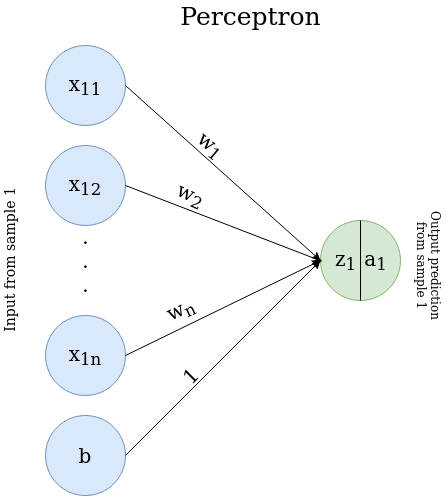

In [1]:
from IPython.display import Image
Image(filename='Perceptron.png') 

Notation :
$$X = 
\begin{bmatrix}
x_{11} & x_{12} & \ldots\\
\vdots & \ddots & \\
x_{m1} & & x_{mn}
\end{bmatrix}, \space
y = 
\begin{bmatrix}
y_1\\
\vdots\\
y_m
\end{bmatrix}, \space
w = 
\begin{bmatrix}
w_1\\
\vdots\\
w_n
\end{bmatrix}
$$

Forward Propagation : 

Before go to matrices form we start from one element (sample and/or feature) and then expand to matrices form

$$
z_1 = w_1 x_{11} + \ldots + w_n x_{1n} + b, \space
z = 
\begin{bmatrix}
w_1 x_{11} + \ldots + w_n x_{1n} + b \\
\vdots \\
w_1 x_{m1} + \ldots + w_n x_{mn} + b
\end{bmatrix}
= X w + b
$$

$$
a_1 = \sigma(z_1), \space
a = 
\begin{bmatrix}
\sigma(z_1) \\
\vdots \\
\sigma(z_m)
\end{bmatrix}
= \sigma(z)
$$

$$
e_1 = y_1 - a_1, \space
e = 
\begin{bmatrix}
y_1 - a_1 \\
\vdots \\
y_m - a_m
\end{bmatrix}
= y - a
$$

$$
L_1 = \frac{1}{2} (y_1 - a_1)^2 = \frac{1}{2}e_1^2, \space
L = 
\begin{bmatrix}
\frac{1}{2} e_1 ^ 2 \\
\vdots \\
\frac{1}{2} e_m ^ 2
\end{bmatrix}
= \frac{1}{2} e \odot e
$$

$$
C = \frac{1}{m} \Sigma L_i = \frac{1}{2} (e_1^2 + \ldots + e_m^2) = \frac{1}{2} e^T e
$$

Backward Propagation :

$$
\frac{\partial L_1}{\partial w_1} = \frac{\partial L_1}{\partial a_1} . \frac{\partial a_1}{\partial z_1} . \frac{\partial z_1}{\partial w_1} = -e_1 . a_1 (1 - a_1) . x_{11}
$$

$$
\frac{\partial C}{\partial w_1} = \frac{1}{m} \Sigma \frac{\partial L_i}{\partial w_1} = -e_1 . a_1 (1 - a_1) . x_{11} - \ldots -e_m . a_m (1 - a_m) . x_{m1}
$$

$$ \frac{\partial C}{\partial w} =
\begin{bmatrix}
-e_1 . a_1 (1 - a_1) . x_{11} - \ldots -e_m . a_m (1 - a_m) . x_{m1} \\
\vdots \\
-e_1 . a_1 (1 - a_1) . x_{1n} - \ldots -e_m . a_m (1 - a_m) . x_{mn}
\end{bmatrix}
= -X^T [e \odot a \odot (1 - a)] 
$$

$$
\frac{\partial L_1}{\partial b} = \frac{\partial L_1}{\partial a_1} . \frac{\partial a_1}{\partial z_1} . \frac{\partial z_1}{\partial b} = -e_1 . a_1 (1 - a_1)
$$

$$
\frac{\partial C}{\partial b} = \frac{1}{m} \Sigma \frac{\partial L_i}{\partial b} = -e_1 . a_1 (1 - a_1) - \ldots -e_m . a_m (1 - a_m) = -Average(e \odot a \odot (1 - a))
$$

Gradient Descent :

$$
w^{(n+1)} = w^{(n)} - \alpha \frac{\partial C}{\partial w} \bigg|_{w^{(n)}}
$$

$$
b^{(n+1)} = b^{(n)} - \alpha \frac{\partial C}{\partial b} \bigg|_{b^{(n)}}
$$

In [2]:
import numpy as np
np.random.seed(2020)

In [3]:
class Perceptron:
    def __init__(self, X, y, alpha, n_epochs):
        self.X = X
        self.y = y
        self.w = np.random.normal(0, 1, size = [self.X.shape[1], 1])
        self.b = 0
        
        self.alpha = alpha
        self.n_epochs = n_epochs
    
    def forward(self):
        z = self.X @ self.w + self.b
        self.a = 1 / (1 + np.exp(-z))
    
    def backward(self):
        e = self.y - self.a
        l = 0.5 * e * e
        self.c = np.average(l)
        dw = -X.T @ (e * self.a * (1 - self.a))
        db = -np.average(e * self.a * (1 - self.a))
        
        self.w -= self.alpha * dw
        self.b -= self.alpha * db
    
    def train(self):
        for epoch in range(self.n_epochs):
            self.forward()
            self.backward()
            
            if (epoch + 1) % 1000 == 0:
                print("Cost after {} iteration : {}".format(epoch + 1, self.c))
        print("Prediction :")
        print(self.a)

In [4]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0,0,1,1]]).T

model = Perceptron(X, y, alpha = 0.1, n_epochs = 10000)
model.train()

Cost after 1000 iteration : 0.008563980869791045
Cost after 2000 iteration : 0.003724650937889449
Cost after 3000 iteration : 0.002310212345085703
Cost after 4000 iteration : 0.0016568149167482604
Cost after 5000 iteration : 0.0012850394667728473
Cost after 6000 iteration : 0.0010465582139164947
Cost after 7000 iteration : 0.0008811723516423592
Cost after 8000 iteration : 0.0007600179418623171
Cost after 9000 iteration : 0.0006675879378957625
Cost after 10000 iteration : 0.0005948311831906977
Prediction :
[[0.05270867]
 [0.02901151]
 [0.98386369]
 [0.97036224]]
